In [37]:
import posixpath
import pandas as pd
import geopandas as gpd
import shapely
import numpy as np
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import datetime

In [38]:
data_root = "D:/OneDrive/Documents/Cours/4A/SFE/data/"

kh_fronts = gpd.read_file(posixpath.join(data_root, "KH-5_ARGON_fronts/KH-5_ARGON_fronts.shp")).to_crs(epsg=25833)
kh_fronts.head()

,image,mission,timestamp,RGI60ID,RGI70ID,front_id,front_dir,geometry
0,DS09058A024MC012,KH-5 ARGON 9058A,1963-08-29,RGI60-07.00791,RGI2000-v7.0-G-07-01223,2,NE,"LINESTRING (446989.216 8830958.43, 446941.212 ..."
1,DS09058A024MC012,KH-5 ARGON 9058A,1963-08-29,RGI60-07.00777,RGI2000-v7.0-G-07-01225,3,E,"LINESTRING (447461.671 8832029.666, 447497.042..."
2,DS09058A024MC012,KH-5 ARGON 9058A,1963-08-29,RGI60-07.00775,RGI2000-v7.0-G-07-01229,4,SE,"LINESTRING (446131.469 8835920.477, 446232.529..."
3,DS09058A024MC012,KH-5 ARGON 9058A,1963-08-29,RGI60-07.00709,RGI2000-v7.0-G-07-00011,25,W,"LINESTRING (416080.008 8819152.093, 416146.96 ..."
4,DS09058A024MC012,KH-5 ARGON 9058A,1963-08-29,RGI60-07.00664,RGI2000-v7.0-G-07-00015,26,W,"LINESTRING (415736.404 8813938.659, 415733.877..."


In [39]:
landsat_fronts = gpd.read_file(posixpath.join(data_root, "Landsat_MSS_fronts/Landsat_MSS_fronts.shp")).to_crs(epsg=25833)
landsat_fronts.head()

,image,mission,timestamp,RGI60ID,RGI70ID,front_id,front_dir,geometry
0,LM02_L1GS_245002_19760505_20200907_02_T2,Landsat 2 MSS,1976-05-05,RGI60-07.00791,RGI2000-v7.0-G-07-01223,2,NE,"LINESTRING (446917.357 8830600.499, 446900.231..."
1,LM02_L1GS_245002_19760505_20200907_02_T2,Landsat 2 MSS,1976-05-05,RGI60-07.00777,RGI2000-v7.0-G-07-01225,3,E,"LINESTRING (447150.28 8832426.203, 447136.579 ..."
2,LM02_L1GS_245002_19760505_20200907_02_T2,Landsat 2 MSS,1976-05-05,RGI60-07.00775,RGI2000-v7.0-G-07-01229,4,SE,"LINESTRING (446105.553 8836403.019, 446122.679..."
3,LM02_L1GS_245002_19760505_20200907_02_T2,Landsat 2 MSS,1976-05-05,RGI60-07.00794,RGI2000-v7.0-G-07-01268,5,NE,"LINESTRING (445687.662 8843966.161, 445629.431..."
4,LM02_L1GS_245002_19760505_20200907_02_T2,Landsat 2 MSS,1976-05-05,RGI60-07.00790,RGI2000-v7.0-G-07-01266,6,NE,"LINESTRING (442212.658 8844269.303, 442116.749..."


In [40]:
all_fronts = pd.concat([kh_fronts, landsat_fronts], ignore_index=True)
all_fronts.head()

,image,mission,timestamp,RGI60ID,RGI70ID,front_id,front_dir,geometry
0,DS09058A024MC012,KH-5 ARGON 9058A,1963-08-29,RGI60-07.00791,RGI2000-v7.0-G-07-01223,2,NE,"LINESTRING (446989.216 8830958.43, 446941.212 ..."
1,DS09058A024MC012,KH-5 ARGON 9058A,1963-08-29,RGI60-07.00777,RGI2000-v7.0-G-07-01225,3,E,"LINESTRING (447461.671 8832029.666, 447497.042..."
2,DS09058A024MC012,KH-5 ARGON 9058A,1963-08-29,RGI60-07.00775,RGI2000-v7.0-G-07-01229,4,SE,"LINESTRING (446131.469 8835920.477, 446232.529..."
3,DS09058A024MC012,KH-5 ARGON 9058A,1963-08-29,RGI60-07.00709,RGI2000-v7.0-G-07-00011,25,W,"LINESTRING (416080.008 8819152.093, 416146.96 ..."
4,DS09058A024MC012,KH-5 ARGON 9058A,1963-08-29,RGI60-07.00664,RGI2000-v7.0-G-07-00015,26,W,"LINESTRING (415736.404 8813938.659, 415733.877..."


## Comparison of KH fronts retrieved from a same series

In [41]:
# selecting a specific series of images, and a specific glaciers with a front on each image.
glacier = kh_fronts.loc[kh_fronts.timestamp == "1963-08-29"].loc[kh_fronts.RGI70ID == "RGI2000-v7.0-G-07-01166"]
glacier

,image,mission,timestamp,RGI60ID,RGI70ID,front_id,front_dir,geometry
49,DS09058A024MC012,KH-5 ARGON 9058A,1963-08-29,RGI60-07.00896,RGI2000-v7.0-G-07-01166,114,N,"LINESTRING (634297.177 8760360.346, 634490.454..."
111,DS09058A024MC013,KH-5 ARGON 9058A,1963-08-29,RGI60-07.00896,RGI2000-v7.0-G-07-01166,114,N,"LINESTRING (634151.483 8760173.19, 634279.328 ..."


### Resample with constant distance (not sure it is useful)

In [42]:
# from utils import geometry

# def min_distance(line):
#     coords = np.array(line.coords)
#     lengths = np.array([shapely.LineString([coords[i, :], coords[i+1, :]]).length for i in range(coords.shape[0] - 1)])
#     return lengths.min(), lengths.argmin()

# # d, i = min_distance(line)
# # reshaped_line = geometry.redistribute_vertices(line, d)
# # reshaped_line

# glacier.loc[:, "min_distance"] = glacier.geometry.apply(lambda x: min_distance(x)[0])
# glacier

In [43]:
# d = glacier.min_distance.min()
# glacier.loc[:, "geometry"] = glacier.geometry.apply(lambda x: geometry.redistribute_vertices(x, d))
# glacier

### Evaluate distances

In [44]:
# def distance(front1, front2):
#     '''
#     Calculates the distance between two fronts, by dividing the area of the polygon by the mean length.
#     If the front lengths are too different (50%), return None.
#     '''
#     if (front1.length > 1.5*front2.length) or (front2.length > 1.5*front1.length):
#         return None
#     else:
#         polygon = Polygon(list(front1.coords) + list(front2.coords)[::-1])
#         return polygon.area/((front1.length + front2.length)/2 )
    
# line1 = glacier.geometry.iloc[0]
# line2 = glacier.geometry.iloc[1]

# distance(line1, line2)

## Systematic comparison

In [45]:
# timestamps = kh_fronts.timestamp.unique()
# di = 0
# g = ""
# d = ""
# for i in range(len(timestamps)):
#     kh_fronts_date = kh_fronts.loc[kh_fronts.timestamp == timestamps[i]]

#     glaciers = kh_fronts_date.RGI70ID.unique()
#     for j in range(len(glaciers)):
#         kh_fronts_date_glacier = kh_fronts_date.loc[kh_fronts_date.RGI70ID == glaciers[j]]
        
#         for k in range(len(kh_fronts_date_glacier.geometry) - 1):
#             for l in range(k + 1, len(kh_fronts_date_glacier.geometry)):
#                 front1 = kh_fronts_date_glacier.geometry.iloc[k]
#                 front2 = kh_fronts_date_glacier.geometry.iloc[l]
#                 dist = distance(front1, front2)
#                 if dist is not None:
#                     if dist > di:
#                         di = dist
#                         g = glaciers[j]
#                         d = timestamps[i]
# di, g, d

## First Observations

In [46]:
print(len(all_fronts.RGI70ID.value_counts()), "glaciers observed")
print(len(all_fronts.front_id.value_counts()), "fronts observed")

171 glaciers observed
180 fronts observed


## Accuracy 

### KH

In [47]:
all_fronts.front_id.values.max()

180

In [48]:
fronts = all_fronts.loc[all_fronts.front_id == 122]
fronts_1962 = fronts.loc[fronts.timestamp.apply(lambda x:x.year) == 1962]
fronts_1976 = fronts.loc[fronts.timestamp.apply(lambda x:x.year) == 1976]
c_1962 = np.array([shapely.centroid(fronts_1962.iloc[0].geometry).x, shapely.centroid(fronts_1962.iloc[0].geometry).y])
c_1976 = np.array([shapely.centroid(fronts_1962.iloc[0].geometry).x, shapely.centroid(fronts_1976.iloc[0].geometry).y])

sgn = np.sign(np.dot(c_1976 - c_1962, np.array([0, 1])))
sgn

1.0

Timestamp: 1962-05-16 00:00:00, Mean distance: 27.57 m, Standard deviation: 664.59 m
Timestamp: 1963-08-29 00:00:00, Mean distance: 6.46 m, Standard deviation: 247.59 m
Skipped 61 comparisons out of 540 due to length difference.


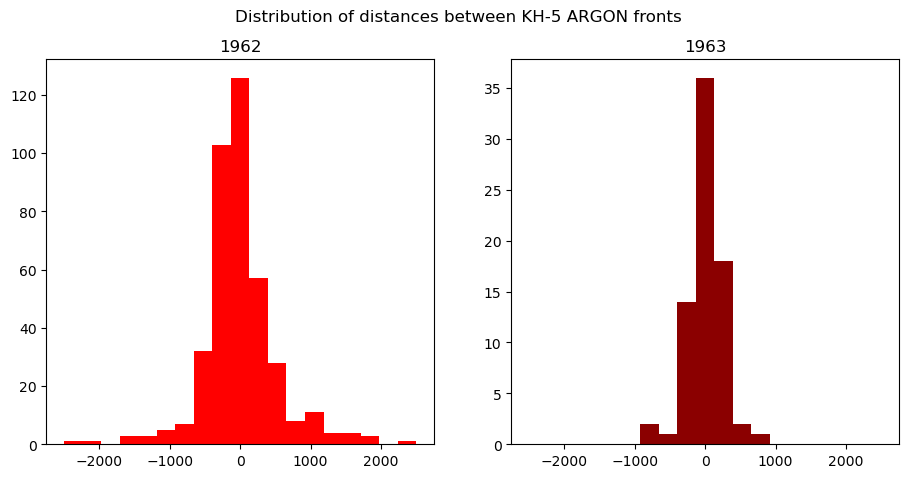

In [51]:
def distance_abs(front1, front2):
    '''
    Calculates the absolute distance between two fronts, by dividing the area of the polygon by the mean length.
    If the front lengths are too different (50%), return None.
    '''
    if (front1.length > 1.5*front2.length) or (front2.length > 1.5*front1.length):
        return None
    else:
        polygon = Polygon(list(front1.coords) + list(front2.coords)[::-1])
        return polygon.area/((front1.length + front2.length)/2 )
    
def distance(front1, front2, dir_1, dir_2):
    '''
    Calculates the signed distance between two fronts, using flow direction.
    '''
    assert dir_1 == dir_2, "Fronts must have the same direction" # maybe transform into return None?
    dist_abs = distance_abs(front1, front2)
    if dist_abs is not None:
        # transform direction into av vector:
        if dir_1 == "N":
            dir_vector = np.array([0, 1])
        elif dir_1 == "S":
            dir_vector = np.array([0, -1])
        elif dir_1 == "E":
            dir_vector = np.array([1, 0])
        elif dir_1 == "W":
            dir_vector = np.array([-1, 0])
        elif dir_1 == "NE":
            dir_vector = np.array([1, 1]) / np.sqrt(2)
        elif dir_1 == "NW":
            dir_vector = np.array([-1, 1]) / np.sqrt(2)
        elif dir_1 == "SE":
            dir_vector = np.array([1, -1]) / np.sqrt(2)
        elif dir_1 == "SW":
            dir_vector = np.array([-1, -1]) / np.sqrt(2)
        else:
            raise ValueError(f"Unknown direction: {dir_1}")
        
        # centroids:
        c_1 = np.array([shapely.centroid(front1).x, shapely.centroid(front1).y])
        c_2 = np.array([shapely.centroid(front2).x, shapely.centroid(front2).y])
        
        # sign
        sgn = np.sign(np.dot(c_2 - c_1, dir_vector))
        
        return dist_abs * sgn
    else: 
        return None
        

dists = []
skip_count = 0
total_count = 0
timestamps = [datetime.datetime(1962, 5, 16), datetime.datetime(1963, 8, 29)]
for timestamp in timestamps:
    dists_timestamp = []
    front_ids = kh_fronts.loc[kh_fronts.timestamp == timestamp].front_id.unique()
    for i_front_id, front_id in enumerate(front_ids):
        fronts = kh_fronts.loc[kh_fronts.front_id == front_id].loc[kh_fronts.timestamp == timestamp]
        for k in range(len(fronts.geometry) - 1):
            for l in range(k + 1, len(fronts.geometry)):
                front1 = fronts.geometry.iloc[k]
                front2 = fronts.geometry.iloc[l]
                dir_1 = fronts.front_dir.iloc[k]
                dir_2 = fronts.front_dir.iloc[l]
                # print(front_id) # to identify the fronts that have different flow directions.
                dist = distance(front1, front2, dir_1, dir_2)
                if dist is not None:
                    dists_timestamp.append(dist)
                else:
                    skip_count += 1
                total_count += 1
    dists.append(dists_timestamp)
        
dists_npy = [np.array(dists_timestamp) for dists_timestamp in dists]
sigma = [dists_npy_timestamp.std() for dists_npy_timestamp in dists_npy]
mean = [dists_npy_timestamp.mean() for dists_npy_timestamp in dists_npy]

for i in range(len(timestamps)):
    print(f"Timestamp: {timestamps[i]}, Mean distance: {mean[i]:.2f} m, Standard deviation: {sigma[i]:.2f} m")

print(f"Skipped {skip_count} comparisons out of {total_count} due to length difference.")
fig, axs = plt.subplots(ncols=len(timestamps), figsize=(11, 5))
axs[0].hist(dists[0], bins=np.linspace(-2500, 2500, 20), color="red")
axs[0].set_title(timestamps[0].strftime("%Y"))
axs[1].hist(dists[1], bins=np.linspace(-2500, 2500, 20), color="darkred")
axs[1].set_title(timestamps[1].strftime("%Y"))
fig.suptitle("Distribution of distances between KH-5 ARGON fronts")
fig.savefig("images/KH-5_ARGON_fonts_accuracy.png", bbox_inches="tight")

### Landsat

Year: 1976, Mean distance: -3.19 m, Standard deviation: 125.33 m
Year: 1978, Mean distance: 23.66 m, Standard deviation: 122.23 m
Skipped 59 comparisons out of 337 due to length difference


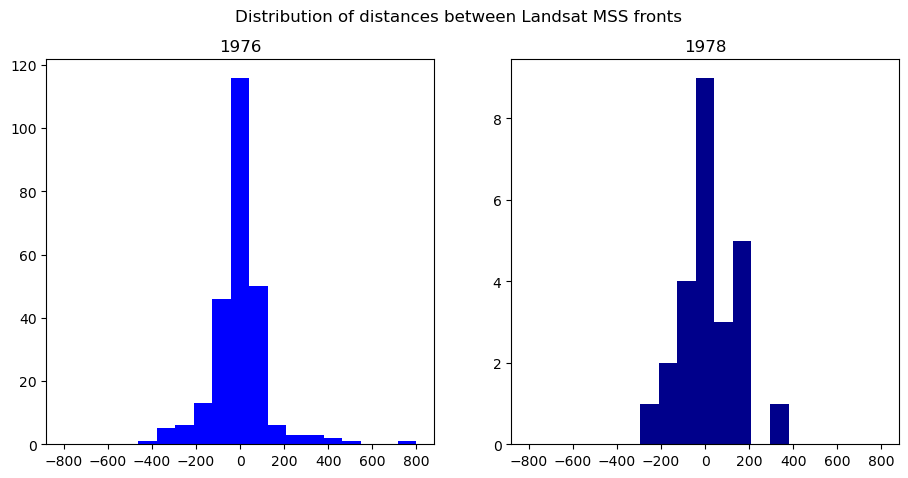

In [52]:
def get_year(timestamp):
    return timestamp.year

dists = []
skip_count = 0
total_count = 0
years = [1976, 1978]
for year in years:
    dists_year = []
    front_ids = landsat_fronts.loc[landsat_fronts.timestamp.apply(get_year) == year].front_id.unique()
    for front_id in front_ids:
        fronts = landsat_fronts.loc[landsat_fronts.front_id == front_id].loc[landsat_fronts.timestamp.apply(get_year) == year]
        for k in range(len(fronts.geometry) - 1):
            for l in range(k + 1, len(fronts.geometry)):
                front1 = fronts.geometry.iloc[k]
                front2 = fronts.geometry.iloc[l]
                dir_1 = fronts.front_dir.iloc[k]
                dir_2 = fronts.front_dir.iloc[l]
                # print(front_id) # to identify the fronts that have different flow directions.
                dist = distance(front1, front2, dir_1, dir_2)
                if dist is not None:
                    dists_year.append(dist)
                else:
                    skip_count += 1
                total_count += 1
    dists.append(dists_year)
        
dists_npy = [np.array(dists_year) for dists_year in dists]
sigma = [dists_npy_year.std() for dists_npy_year in dists_npy]
mean = [dists_npy_year.mean() for dists_npy_year in dists_npy]

for i in range(len(years)):
    print(f"Year: {years[i]}, Mean distance: {mean[i]:.2f} m, Standard deviation: {sigma[i]:.2f} m")

print(f"Skipped {skip_count} comparisons out of {total_count} due to length difference")

fig, axs = plt.subplots(ncols=len(years), figsize=(11, 5))
axs[0].hist(dists[0], bins=np.linspace(-800, 800, 20), color="blue")
axs[0].set_title(years[0])
axs[1].hist(dists[1], bins=np.linspace(-800, 800, 20), color="darkblue")
axs[1].set_title(years[1])
fig.suptitle("Distribution of distances between Landsat MSS fronts")
fig.savefig("images/Landsat_MSS_fonts_accuracy.png", bbox_inches="tight")

## Retreat / Advance between KH / Landsat

In [66]:
results = pd.DataFrame(
    [],
    columns = ["front_id", "year_1", "year_2", "distance"]
)
# skip_count = 0
# total_count = 0
years = [1962, 1963, 1976, 1978]

for front in all_fronts.front_id.unique():
    # compare observations from any year to fronts from any other year, for a specific front.
    for i_year in range(len(years) - 1):
        year = years[i_year]
        fronts = all_fronts.loc[all_fronts.front_id == front].loc[all_fronts.timestamp.apply(get_year) == year]
        for i_other_year in range(i_year + 1, len(years)):
            other_year = years[i_other_year]
            other_fronts = all_fronts.loc[all_fronts.front_id == front].loc[all_fronts.timestamp.apply(get_year) == other_year]
            
            dists = []
            # compare all the observations between them
            for k in range(len(fronts.geometry)):
                for l in range(len(other_fronts.geometry)):
                    front1 = fronts.geometry.iloc[k]
                    front2 = other_fronts.geometry.iloc[l]
                    dist = distance(front1, front2)
                    if dist is not None: # recall: distance returns None if the lengths of the fronts are too different
                        dists.append(dist)
                    else:
                        skip_count += 1
                    total_count += 1
            
            if not dists == []:
                # horrible hack to load an array as a value in a DataFrame
                results_i = pd.DataFrame(
                    [[front, year, other_year, np.array(dists)]],
                    columns=["front_id", "year_1", "year_2", "distance"]
                )      
            else: # load None instead of a list of distances
                results_i = pd.DataFrame(
                    [[front, year, other_year, None]],
                    columns=["front_id", "year_1", "year_2", "distance"]
                )
            results = pd.concat([results, results_i])
results.reset_index(drop=True, inplace=True)
results = results.dropna().reset_index(drop=True)
results

,front_id,year_1,year_2,distance
0,2,1962,1963,"[79.48402579080955, 603.780206891322, 5.887976..."
1,2,1962,1976,"[400.01519757875695, 461.60260977397235, 449.3..."
2,2,1962,1978,"[564.3538386904038, 1109.0978650814443]"
3,2,1963,1976,"[300.9716348393031, 392.455685340897, 386.9872..."
4,2,1963,1978,[505.13812309827387]
...,...,...,...,...
436,87,1976,1978,[91.97451945462406]
437,82,1976,1978,[153.44472935472436]
438,66,1976,1978,[72.56704667293884]
439,72,1976,1978,[33.72669053388882]


Trying to identify a distribution pattern to compare observations from different years:

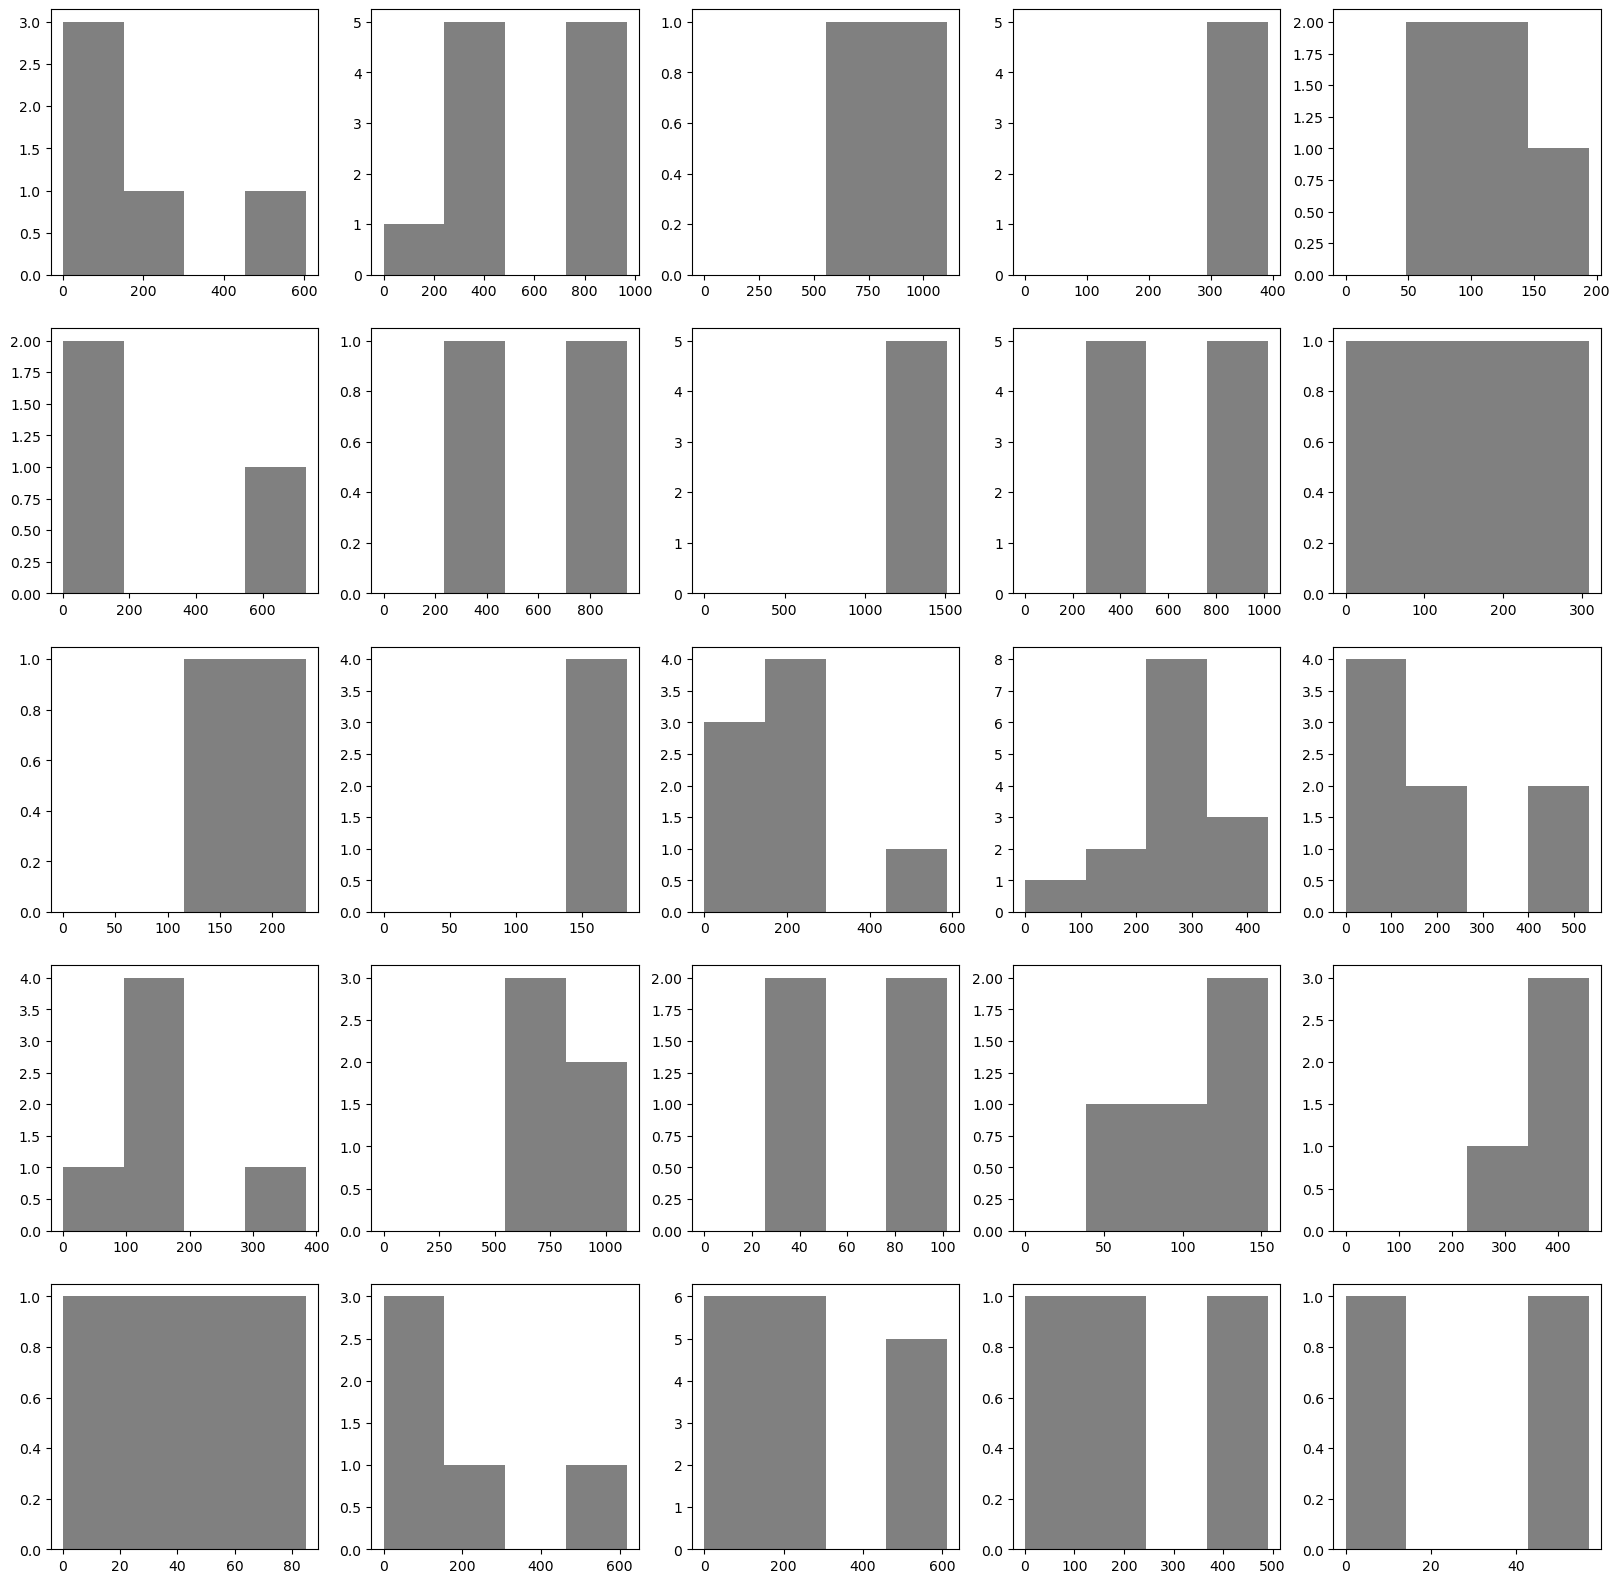

In [115]:
fig, axs = plt.subplots(ncols=5, nrows=5, figsize=[20, 20])
c = 0
for i in range(len(results)):
    if len(results.distance[i]) > 1:
        if c < 25:
            axs[c//5, c%5].hist(results.distance[i], bins=np.linspace(0, results.distance[i].max(), 5), color="gray")
        c += 1

**Conclusion :** No pattern identified → the mean value is chosen

In [136]:
# select only observations that show a displacement between the 1960's and 1970's.
important_results = results.loc[(results.year_1 == 1962) | (results.year_1 == 1963)].loc[(results.year_2 == 1976) | (results.year_1 == 1978)]
important_results

,front_id,year_1,year_2,distance,mean_distance
1,2,1962,1976,"[400.01519757875695, 461.60260977397235, 449.3...",645.983663
3,2,1963,1976,"[300.9716348393031, 392.455685340897, 386.9872...",369.829291
6,3,1963,1976,"[158.29084226982758, 729.9995198623386, 86.765...",325.018500
8,4,1962,1976,"[1450.7132367907936, 1511.82316731564, 1309.18...",1411.992376
9,4,1963,1976,"[422.5270542819276, 470.5395858628364, 310.559...",664.223629
...,...,...,...,...,...
419,60,1962,1976,"[418.5938914190559, 497.5942464005028, 438.834...",451.674332
423,106,1962,1976,[663.3635314629939],663.363531
424,106,1963,1976,"[414.85193631182557, 344.8965477609312, 537.31...",444.537016
426,109,1962,1976,[921.1364878434589],921.136488


In [151]:
final_results = pd.DataFrame(
    [],
    columns=["front_id", "distance"]
)

for front in important_results.front_id.unique():
    
    dist_final = []
    for dist in important_results.loc[important_results.front_id == front].distance.values:
        dist_final = dist_final + dist.tolist()
        
    final_results_i = pd.DataFrame(
        [[front, dist_final]],
        columns=["front_id", "distance"]
    )
    final_results = pd.concat([final_results, final_results_i], ignore_index=True)
    
final_results.loc[:, "mean_distance"] = final_results.distance.apply(lambda x: np.array(x).mean())
final_results

,front_id,distance,mean_distance
0,2,"[400.01519757875695, 461.60260977397235, 449.3...",559.685421
1,3,"[158.29084226982758, 729.9995198623386, 86.765...",325.018500
2,4,"[1450.7132367907936, 1511.82316731564, 1309.18...",913.479878
3,25,"[159.55909545053623, 231.93919069221377, 160.1...",171.413419
4,26,"[19.460612848164935, 270.93067269949955, 335.4...",244.131883
...,...,...,...
113,70,[465.98594116974397],465.985941
114,61,[647.9081640983626],647.908164
115,60,"[418.5938914190559, 497.5942464005028, 438.834...",451.674332
116,106,"[663.3635314629939, 414.85193631182557, 344.89...",488.302319


(array([52., 34., 16.,  9.,  3.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.,  1.,  0.,  0.,  0.,  0.]),
 array([   0.        ,  263.15789474,  526.31578947,  789.47368421,
        1052.63157895, 1315.78947368, 1578.94736842, 1842.10526316,
        2105.26315789, 2368.42105263, 2631.57894737, 2894.73684211,
        3157.89473684, 3421.05263158, 3684.21052632, 3947.36842105,
        4210.52631579, 4473.68421053, 4736.84210526, 5000.        ]),
 <BarContainer object of 19 artists>)

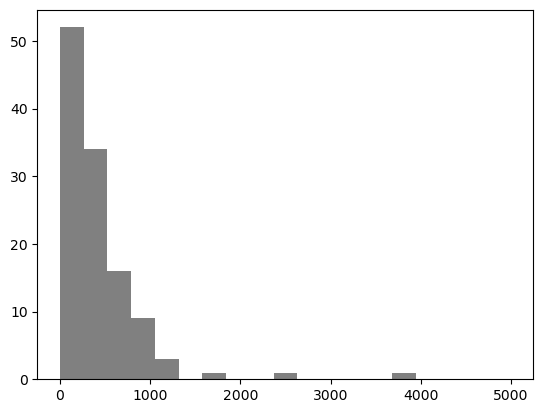

In [165]:
fig, ax = plt.subplots()
ax.hist(final_results.mean_distance.values.tolist(), bins=np.linspace(0, 5000, 20), color="gray")